In [2]:
#!pip install "dask[complete]"
#!pip install "napari[all]"

# Visualizations before preprocessing

In [3]:
import dask.array as da
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import napari

In [4]:
# Finger inputs
finger = da.from_npy_stack(Path('..', 'raw-data', 'index', 'S232028')).compute()
# Finger label
finger_label = da.from_npy_stack(Path('..', 'raw-data', 'labels', 'index', 'S232028')).compute()

In [5]:
# The minimum value is out of range of the HU.
print("Min:", np.min(finger))
print("Max:", np.max(finger))
print("Unique values:", np.unique(finger)[:10])

Min: -1552.0
Max: 3146.0
Unique values: [-1552. -1543. -1540. -1533. -1527. -1519. -1518. -1517. -1515. -1511.]


In [6]:
print(finger)

[[[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 ...

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -10

In [7]:
print(f"(channel, height, width): {finger.shape}")

(channel, height, width): (676, 395, 400)


In [8]:
# CT scan for the finger
ct_scan = da.stack(finger, axis=0)
print("CT info for finger input:")
ct_scan

CT info for finger input:


dask.array<stack, shape=(676, 395, 400), dtype=float64, chunksize=(1, 395, 400), chunktype=numpy.ndarray>

In [9]:
# CT scan for the finger label
ct_scan_label = da.stack(finger_label, axis=0)
print("CT info for finger label:")
ct_scan_label

CT info for finger label:


dask.array<stack, shape=(604, 1081, 523), dtype=int64, chunksize=(1, 1081, 523), chunktype=numpy.ndarray>

# CT scan using napari

In [10]:
viewer = napari.Viewer()

In [11]:
# Visualize 
spacing = np.array([0.05, 0.05, 0.05])

ct_scan_view = viewer.add_image(
    ct_scan,
    scale=spacing
)

In [12]:
spacing = np.array([0.05, 0.05, 0.05])

ct_scan_view_label = viewer.add_image(
    ct_scan_label,
    scale=spacing
)

# Visualizing slices

Input index 320th slice:


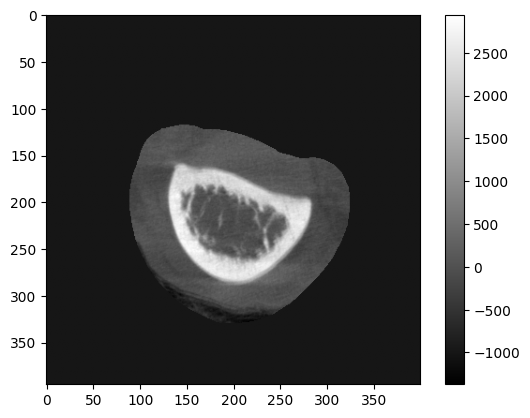

In [13]:
print("Input index 320th slice:")
plt.imshow(finger[320], cmap="gray")
plt.colorbar()
plt.show()

Label index 320th slice:


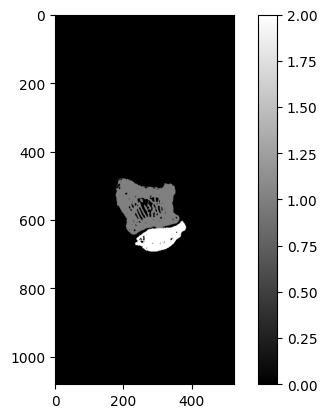

In [14]:
print("Label index 320th slice:")
plt.imshow(finger_label[320], cmap='gray')
plt.colorbar()
plt.show()